# YouTube Views Prediction


Goal: Create a machine leanring model that can help influencers predict the number of views for youtuber's next video

Target Audience: Youtuber

Object: Build machine learing model to predict video views

Dataset: Obtained from YouTube Data API v3

##### Model Features

- Title
- Tag
- Thumbnail
- Description
- Subscriber count of the channel
- Number of videos posted by the channel
- View count of the whole channel
- Age of the channel
- Date Published
- View Count
- Like Count
- Comment Count 


## 1. Collecting Data from API


### Raw Data Fields

- country_code   
- video_id   
- published_at   
- published_date   
- data_fetch_date   
- title   
- description   
- thumbnail_link   
- video_len_in_sec   
- views   
- likes   
- comments   
- tags   
- channel_id   
- channel_title   
- channel_description   
- channel_published_time   
- channel_views   
- channel_subscriber_count   
- channel_video_count   
- channel_topic_ids   
- channel_topic_categories   
- channel_topic_categories_ref   
- channel_keywords   
- channel_published_date   


##### API Inform

In [1]:
# id	title
# 1		Film & Animation
# 2		Autos & Vehicles
# 10	Music
# 15	Pets & Animals
# 17	Sports
# 18	Short Movies
# 19	Travel & Events
# 20	Gaming
# 21	Videoblogging
# 22	People & Blogs
# 23	Comedy
# 24	Entertainment
# 25	News & Politics
# 26	Howto & Style
# 27	Education
# 28	Science & Technology
# 29	Nonprofits & Activism
# 30	Movies
# 31	Anime/Animation
# 32	Action/Adventure
# 33	Classics
# 34	Comedy
# 35	Documentary
# 36	Drama
# 37	Family
# 38	Foreign
# 39	Horror
# 40	Sci-Fi/Fantasy
# 41	Thriller
# 42	Shorts
# 43	Shows
# 44	Trailers

yt_category_ids = {
    '1' : 'Film & Animation',
    '2' : 'Autos & Vehicles',
    '10' : 'Music',
    '15' : 'Pets & Animals',
    '17' : 'Sports',
    '18' : 'Short Movies',
    '19' : 'Travel & Events',
    '20' : 'Gaming',
    '21' : 'Videoblogging',
    '22' : 'People & Blogs',
    '23' : 'Comedy',
    '24' : 'Entertainment',
    '25' : 'News & Politics',
    '26' : 'Howto & Style',
    '27' : 'Education',
    '28' : 'Science & Technology',
    '29' : 'Nonprofits & Activism',
    '30' : 'Movies',
    '31' : 'Anime/Animation',
    '32' : 'Action/Adventure',
    '33' : 'Classics',
    '34' : 'Comedy',
    '35' : 'Documentary',
    '36' : 'Drama',
    '37' : 'Family',
    '38' : 'Foreign',
    '39' : 'Horror',
    '40' : 'Sci-Fi/Fantasy',
    '41' : 'Thriller',
    '42' : 'Shorts',
    '43' : 'Shows',
    '44' : 'Trailers'
}

yt_topic_ids = {
    "/m/04rlf" : "Music",
    "/m/02mscn" : "Christian music",
    "/m/0ggq0m" : "Classical music",
    "/m/01lyv" : "Country",
    "/m/02lkt" : "Electronic music",
    "/m/0glt670" : "Hip hop music",
    "/m/05rwpb" : "Independent music",
    "/m/03_d0" : "Jazz",
    "/m/028sqc" : "Music of Asia",
    "/m/0g293" : "Music of Latin America",
    "/m/064t9" : "Pop music",
    "/m/06cqb" : "Reggae",
    "/m/06j6l" : "Rhythm and blues",
    "/m/06by7" : "Rock music",
    "/m/0gywn" : "Soul music",
    "/m/0bzvm2" : "Gaming",
    "/m/025zzc" : "Action game",
    "/m/02ntfj" : "Action-adventure game",
    "/m/0b1vjn" : "Casual game",
    "/m/02hygl" : "Music video game",
    "/m/04q1x3q" : "Puzzle video game",
    "/m/01sjng" : "Racing video game",
    "/m/0403l3g" : "Role-playing video game",
    "/m/021bp2" : "Simulation video game",
    "/m/022dc6" : "Sports game",
    "/m/03hf_rm" : "Strategy video game",
    "/m/06ntj" : "Sports",
    "/m/0jm_" : "American football",
    "/m/018jz" : "Baseball",
    "/m/018w8" : "Basketball",
    "/m/01cgz" : "Boxing",
    "/m/09xp_" : "Cricket",
    "/m/02vx4" : "Football",
    "/m/037hz" : "Golf",
    "/m/03tmr" : "Ice hockey",
    "/m/01h7lh" : "Mixed martial arts",
    "/m/0410tth" : "Motorsport",
    "/m/07bs0" : "Tennis",
    "/m/07_53" : "Volleyball",
    "/m/02jjt" : "Entertainment",
    "/m/09kqc" : "Humor",
    "/m/02vxn" : "Movies",
    "/m/05qjc" : "Performing arts",
    "/m/066wd" : "Professional wrestling",
    "/m/0f2f9" : "TV shows",
    "/m/019_rr" : "Lifestyle",
    "/m/032tl" : "Fashion",
    "/m/027x7n" : "Fitness",
    "/m/02wbm" : "Food",
    "/m/03glg" : "Hobby",
    "/m/068hy" : "Pets",
    "/m/041xxh" : "Physical attractiveness [Beauty]",
    "/m/07c1v" : "Technology",
    "/m/07bxq" : "Tourism",
    "/m/07yv9" : "Vehicles",
    "/m/098wr" : "Society",
    "/m/09s1f" : "Business",
    "/m/0kt51" : "Health",
    "/m/01h6rj" : "Military",
    "/m/05qt0" : "Politics",
    "/m/06bvp" : "Religion",
    "/m/01k8wb" : "Knowledge",
    "/g/120yrv6h" : "Tourism",
    "/g/120y8l81" : "Enterprise"
}

##### load library

In [2]:
import requests, sys, time, os, argparse
from datetime import date
from datetime import datetime
import pandas as pd
from pprint import pprint
import random
import dill
import re
import numpy as np
import matplotlib.pyplot as plt
import collections
import os.path
from cryptography.fernet import Fernet
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

##### get data functions

In [3]:
# Change video duration to seconds

def YTDurationToSeconds(duration):
    if duration == "P0D":
        return 0
    match = re.match('PT(\d+H)?(\d+M)?(\d+S)?', duration).groups()
    hours = _js_parseInt(match[0]) if match[0] else 0
    minutes = _js_parseInt(match[1]) if match[1] else 0
    seconds = _js_parseInt(match[2]) if match[2] else 0
    return hours * 3600 + minutes * 60 + seconds

# js-like parseInt
# https://gist.github.com/douglasmiranda/2174255
def _js_parseInt(string):
    return int(''.join([x for x in string if x.isdigit()]))

# example output 
YTDurationToSeconds(u'PT2H15M33S')
# YTDurationToSeconds(u'P0D')

8133

In [4]:
# Display to the HTML

from IPython.display import Image, HTML

def path_to_image_html(path):
    '''
     This function essentially convert the image url to 
     '<img src="'+ path + '"/>' format. And one can put any
     formatting adjustments to control the height, aspect ratio, size etc.
     within as in the below example. 
    '''

    return '<img src="'+ path + '" style=max-height:124px;"/>'

##### API_KEY


In [5]:
# Print ERROR message
def eprint(*args, **kwargs):
    print(*args, file=sys.stderr, **kwargs)

In [6]:
# Generate or load existing pw key
pw_key_path = 'API_Key/pw-key.pkd'

if os.path.isfile(pw_key_path):
    # Load pw key
    with open(pw_key_path, 'rb') as f:
        pw_key = dill.load(f)
else:
    # Create new pw key
    pw_key = Fernet.generate_key()

    # Save new pw key
    with open(pw_key_path, 'wb') as f:
        dill.dump(pw_key, f)

fernet = Fernet(pw_key)

In [7]:
# Decode and obtain API key
enc_api_key_path = 'API_Key/enc-api-key.pkd'

if os.path.isfile(enc_api_key_path):
    # Load enc api key
    with open(enc_api_key_path, 'rb') as f:
        enc_api_key = dill.load(f)
else:
    eprint("Encrypted API Key cannot be found!")

#     # Save enc api key
#     with open(enc_api_key_path, 'wb') as f:
#         dill.dump(enc_api_key, f)

# Get API key
api_key = fernet.decrypt(enc_api_key.encode()).decode()

##### Get video informations

In [8]:

def search_videos_request(page_token, country_code="US", query="", topic_id="", published_after="", published_before=""):
    # Builds the URL and requests the JSON from it
    query_filter = "" if query == "" else "&q=" + query
    topic_id_filter = "" if topic_id == "" else "&topicId=" + topic_id
    published_after_filter = "" if published_after == "" else "&publishedAfter=" + published_after
    published_before_filter = "" if published_before == "" else "&publishedBefore=" + published_before
    
    search_videos_request_url = f"https://www.googleapis.com/youtube/v3/search?part=snippet{page_token}&type=video&key={api_key}&maxResults=50&regionCode={country_code}{query_filter}{topic_id_filter}{published_after_filter}{published_before_filter}"
    search_videos_request = requests.get(search_videos_request_url, verify=False)
    
#     print(search_videos_request_url)
    
    if search_videos_request.status_code == 429:
        print("Temp-Banned due to excess requests, please wait and continue later")
        sys.exit()
    return search_videos_request.json()


def get_queried_videos(t_video_data, country_code="US", query="", topic_id="", published_after="", published_before="", max_num_results=0):
    num_count = 0
    next_page_token="&"

    # Because the API uses page tokens (which are literally just the same function of numbers everywhere) it is much
    # more inconvenient to iterate over pages, but that is what is done here.
    while next_page_token is not None:
        # A page of data i.e. a list of videos and all needed data
        video_data_page = search_videos_request(next_page_token, country_code, query, topic_id, published_after, published_before)

        # Get the next page token and build a string which can be injected into the request with it, unless it's None,
        # then let the whole thing be None so that the loop ends after this cycle
        next_page_token = video_data_page.get("nextPageToken", None)
        next_page_token = f"&pageToken={next_page_token}&" if next_page_token is not None else next_page_token

        # Get all of the items as a list and let get_videos return the needed features
        items = video_data_page.get('items', [])
        
        for video in items:
            num_count += 1
            published_date = datetime.strptime(video['snippet']['publishedAt'], '%Y-%m-%dT%H:%M:%SZ').isoformat()[:10]
            t_video_data['country_code'].append(country_code)
            t_video_data['video_id'].append(video['id']['videoId'])
            t_video_data['published_at'].append(video['snippet']['publishedAt'])
            t_video_data['published_date'].append(published_date)
            t_video_data['data_fetch_date'].append(date.today())
            t_video_data['title'].append(video['snippet']['title'])
            t_video_data['description'].append(video['snippet']['description'])
            t_video_data['thumbnail_link'].append(video['snippet']['thumbnails']['default']['url'])
            t_video_data['channel_id'].append(video['snippet']['channelId'])
            t_video_data['channel_title'].append(video['snippet']['channelTitle'])
            
            if max_num_results != 0 and num_count >= max_num_results:
                break

        if max_num_results != 0 and num_count >= max_num_results:
            break


# If max_num_results = 0, this function will fetch and store everything collected.
def get_youtube_queried_videos(country_code="US", query="", topic_id="", published_after="", published_before="", max_num_results=0):
    video_data = {
        'country_code':[],
        'video_id':[],
        'published_at':[],
        'published_date':[],
        'data_fetch_date':[],
        'title':[],
        'description':[],
        'thumbnail_link':[],
        'channel_id':[],
        'channel_title':[]
    }

    get_queried_videos(video_data, country_code, query, topic_id, published_after, published_before, max_num_results)

    return video_data

##### Fetch extra video metadata (Views, Likes, Video Length, etc.)

In [9]:

# Any characters to exclude, generally these are things that become problematic in CSV files
unsafe_characters = ['\n', '"']

def prepare_feature(feature):
    # Removes any character from the unsafe characters list and surrounds the whole item in quotes
    for ch in unsafe_characters:
        feature = str(feature).replace(ch, "")
    return f'{feature}'

def get_tags(tags_list):
    # Takes a list of tags, prepares each tag and joins them into a string by the pipe character
    return prepare_feature("|".join(tags_list))

def get_youtube_video_data(video_id):
    single_video_request_url = f"https://www.googleapis.com/youtube/v3/videos?part=statistics,snippet,contentDetails&key={api_key}&id={video_id}"

    single_video_request = requests.get(single_video_request_url, verify=False)

    if single_video_request.status_code == 429:
        print("Temp-Banned due to excess requests, please wait and continue later")
        sys.exit()

    single_video_data = single_video_request.json().get('items', [])[0]

    video_len_in_sec = YTDurationToSeconds(single_video_data['contentDetails']['duration'])
    title = single_video_data['snippet']['title']
    description = single_video_data['snippet']['description']
    published_at = single_video_data['snippet']['publishedAt']
    views = single_video_data['statistics']['viewCount']
    likes = single_video_data['statistics']['likeCount'] if 'likeCount' in single_video_data['statistics'] else 0
    comments = single_video_data['statistics']['commentCount'] if 'commentCount' in single_video_data['statistics'] else 0
    tags = get_tags(single_video_data['snippet'].get("tags", ["[none]"]))
    
    return (video_id, title, description, published_at, video_len_in_sec, views, likes, comments, tags)

def get_youtube_video_metadata(video_id):
    single_video_request_url = f"https://www.googleapis.com/youtube/v3/videos?part=statistics,snippet,contentDetails&key={api_key}&id={video_id}"

    single_video_request = requests.get(single_video_request_url, verify=False)

    if single_video_request.status_code == 429:
        print("Temp-Banned due to excess requests, please wait and continue later")
        sys.exit()

    single_video_data = single_video_request.json().get('items', [])[0]

    video_len_in_sec = YTDurationToSeconds(single_video_data['contentDetails']['duration'])
    views = single_video_data['statistics']['viewCount'] if 'viewCount' in single_video_data['statistics'] else 0
    likes = single_video_data['statistics']['likeCount'] if 'likeCount' in single_video_data['statistics'] else 0
    comments = single_video_data['statistics']['commentCount'] if 'commentCount' in single_video_data['statistics'] else 0
    tags = get_tags(single_video_data['snippet'].get("tags", ["[none]"]))
    
    return (video_id, video_len_in_sec, views, likes, comments, tags)

def fetch_youtube_video_info(data_dict):
    data_dict['video_len_in_sec'] = []
    data_dict['views'] = []
    data_dict['likes'] = []
    data_dict['comments'] = []
    data_dict['tags'] = []

    for video_id in data_dict['video_id']:
        (vid, video_len_in_sec, views, likes, comments, tags) = get_youtube_video_metadata(video_id)
        data_dict['video_len_in_sec'].append(video_len_in_sec)
        data_dict['views'].append(views)
        data_dict['likes'].append(likes)
        data_dict['comments'].append(comments)
        data_dict['tags'].append(tags)

# get_youtube_video_metadata('OM8_rS7YksU')

##### Fetch Channel data

In [10]:
def get_youtube_channel_data(data_df):
    if "channel_views" in data_df:
        print("Channel data has already been fetched. No actions performed.")
    
    channel_id_list = data_df['channel_id'].to_list()
    
    target_list = [*set(channel_id_list)]
    
    channel_data = {
        'channel_id':[],
        'channel_title':[],
        'channel_description':[],
        'channel_published_time':[],
        'channel_views':[],
        'channel_subscriber_count':[],
        'channel_video_count':[],
        'channel_topic_ids':[],
        'channel_topic_categories':[],
        'channel_topic_categories_ref':[],
        'channel_keywords':[],
        'channel_published_date':[]
    }

    channel_id_chunks = [target_list[x:x+50] for x in range(0, len(target_list), 50)]

    for chunk in channel_id_chunks:
        channel_ids_concated = ','.join(chunk)
        channel_request_url = f"https://www.googleapis.com/youtube/v3/channels?id={channel_ids_concated}&key={api_key}&part=statistics,contentDetails,topicDetails,snippet,brandingSettings,status"

        channel_request = requests.get(channel_request_url, verify=False)

        if channel_request.status_code == 429:
            print("Temp-Banned due to excess requests, please wait and continue later")
            sys.exit()

        channel_items = channel_request.json().get('items', [])

        for channel in channel_items:
            channel_data['channel_id'].append(channel['id'])
            channel_data['channel_title'].append(channel['snippet']['title'])
            channel_data['channel_description'].append(channel['snippet']['description'])
            channel_data['channel_published_time'].append(channel['snippet']['publishedAt'])
            channel_data['channel_views'].append(channel['statistics']['viewCount'])
            channel_data['channel_subscriber_count'].append(channel['statistics']['subscriberCount'])
            channel_data['channel_video_count'].append(channel['statistics']['videoCount'])

            if 'topicDetails' in channel and 'topicIds' in channel['topicDetails']:
                channel_data['channel_topic_ids'].append(channel['topicDetails']['topicIds'])
                # channel_data['channel_topic_categories'].append([yt_topic_ids[x] if x in yt_topic_ids else x for x in channel['topicDetails']['topicIds']])
                channel_data['channel_topic_categories'].append([yt_topic_ids[x] for x in channel['topicDetails']['topicIds']])
            else:
                channel_data['channel_topic_ids'].append('')
                channel_data['channel_topic_categories'].append('')
            
            if 'topicDetails' in channel and 'topicCategories' in channel['topicDetails']:
                channel_data['channel_topic_categories_ref'].append(channel['topicDetails']['topicCategories'])
            else:
                channel_data['channel_topic_categories_ref'].append('')

            if 'channel' in channel['brandingSettings'] and 'keywords' in channel['brandingSettings']['channel']:
                channel_data['channel_keywords'].append(channel['brandingSettings']['channel']['keywords'])
            else:
                channel_data['channel_keywords'].append('')
            channel_published_date = datetime.strptime(channel['snippet']['publishedAt'][:-1].split('.', 1)[0], '%Y-%m-%dT%H:%M:%S').isoformat()[:10]
            channel_data['channel_published_date'].append(channel_published_date)

    return channel_data

In [11]:
# Convert date in string to date object
def convert_str_to_date(date_str):
    return datetime.strptime(date_str, "%Y-%m-%d").date()

convert_str_to_date("2022-01-11")

datetime.date(2022, 1, 11)

In [12]:
# Global Data - Date tracker
fetched_data_tracker = {}
# Global Data - Video ID tracker
fetched_data_vids = {}
# Global Data - Year-Month tracker
fetched_data_tracker_ym = {}

# Track fetched video data
def update_fetched_data_status(current_video_df=pd.DataFrame()):
    if current_video_df.empty:
        return
    
    fetched_data_tracker.clear()
    fetched_data_vids.clear()

    for i in current_video_df.index:
        published_date = current_video_df["published_date"][i]
        published_year_month = published_date[:7]
        vid = current_video_df["video_id"][i]

        if published_date in fetched_data_tracker:
            fetched_data_tracker[published_date] += 1
        else:
            fetched_data_tracker[published_date] = 1

        if vid in fetched_data_vids:
            fetched_data_vids[vid] += 1
        else:
            fetched_data_vids[vid] = 1
        
        if published_year_month in fetched_data_tracker_ym:
            fetched_data_tracker_ym[published_year_month] += 1
        else:
            fetched_data_tracker_ym[published_year_month] = 1

In [13]:
# Pick random date between start date and end date (inclusive)

def str_time_prop(start, end, time_format, prop):
    """Get a time at a proportion of a range of two formatted times.

    start and end should be strings specifying times formatted in the
    given format (strftime-style), giving an interval [start, end].
    prop specifies how a proportion of the interval to be taken after
    start.  The returned time will be in the specified format.
    """

    stime = time.mktime(time.strptime(start, time_format))
    etime = time.mktime(time.strptime(end, time_format))

    ptime = stime + prop * (etime - stime)
    
    start_time = time.strftime(time_format, time.localtime(ptime))
    end_time = time.strftime(time_format, time.localtime(ptime + 86400))
    
    return (start_time, end_time)


def random_date(start, end, prop):
    return str_time_prop(start, end, '%Y-%m-%d', prop)

print(random_date("2022-01-01", "2022-12-31", random.random()))

('2022-03-08', '2022-03-09')


In [14]:
import os.path

file_path = 'Data/fitness-video-data.pkd'

## to check both files and directories:
# os.path.exists(file_path)

## to check only files
# os.path.isfile(file_path)


if os.path.isfile(file_path):
    # Load preivous progress to global dataframe
    with open(file_path, 'rb') as f:
        fitness_df = dill.load(f)
    
    update_fetched_data_status(fitness_df)
else:
    # Create empty dataframe
    fitness_df = pd.DataFrame()

In [15]:
# Main function:
# Fetch video data from target start date and end date for X days, and merge data into the main dataset.
#
# If error happens (ex. out of quota), the uncompleted/half-completed data will not be merged to the main dataset.

def fetch_random_date_data(current_video_df=pd.DataFrame(), start_date="2022-01-01", end_date="2022-12-31", num_of_dates=1, min_records_skip=10):
    print("Data fetching process started.")

    # Update already fetched data status
    update_fetched_data_status(current_video_df)

    dates = 0
    retries = 0
    max_retries = 100
    previous_start_date = None
    while dates < num_of_dates:
        # Pick an random date
        (final_start_date, final_end_date) = random_date(start_date, end_date, random.random())

        try:
            if final_start_date in fetched_data_tracker and fetched_data_tracker[final_start_date] > min_records_skip:
                if final_start_date != previous_start_date:
                    print(final_start_date + " data already fetched. No actions performed.")
                retries += 1
                if retries >= max_retries:
                    if final_start_date != previous_start_date:
                        print("Max number of retries reached.")
                    break
            else:
                # Fetch video data
                print(final_start_date + " data is now being fetched......")
                start_time = time.strftime("%Y-%m-%dT00:00:00Z", time.localtime(time.mktime(time.strptime(final_start_date, "%Y-%m-%d"))))
                end_time = time.strftime("%Y-%m-%dT00:00:00Z", time.localtime(time.mktime(time.strptime(final_end_date, "%Y-%m-%d"))))
                retries = 0

                tmp_video_data = get_youtube_queried_videos("US", "fitness", "/m/027x7n", start_time, end_time)

                fetch_youtube_video_info(tmp_video_data)

                # Remove duplicated data
                tmp_duplicated_data_indexes = []
                tmp_video_data_df = pd.DataFrame(tmp_video_data)

                for i in tmp_video_data_df.index:
                    vid = tmp_video_data_df["video_id"][i]
                    if vid in fetched_data_vids:
                        tmp_duplicated_data_indexes.append(i)

                tmp_video_data_df = tmp_video_data_df.drop(tmp_video_data_df.index[tmp_duplicated_data_indexes]).reindex()

                # Fetch channels metadata
                tmp_video_channel_data_df = pd.DataFrame(get_youtube_channel_data(tmp_video_data_df))

                # Merge video data with channel data
                tmp_video_full_df = tmp_video_data_df.merge(tmp_video_channel_data_df, how='inner', on=['channel_id','channel_title'])

                # Wrap up
                num_of_records = len(tmp_video_full_df)
                print(final_start_date + " data fetching succeeded: " + str(num_of_records) + " has been fetched.")

                # Merge fetched data with main data df
                if current_video_df.empty:
                    current_video_df = tmp_video_full_df
                else:
                    current_video_df = pd.concat([
                        pd.DataFrame(tmp_video_full_df),
                        pd.DataFrame(current_video_df),
                    ], ignore_index=True)

                # Update already fetched data status
                update_fetched_data_status(current_video_df)

                dates += 1
        except:
            print(final_start_date + " data fetching failed...")
        
        previous_start_date = final_start_date

    print("Data fetching process finished.")
    return current_video_df

In [16]:
fitness_df

,country_code,video_id,published_at,published_date,data_fetch_date,title,description,thumbnail_link,video_len_in_sec,views,...,channel_description,channel_published_time,channel_views,channel_subscriber_count,channel_video_count,channel_topic_ids,channel_topic_categories,channel_topic_categories_ref,channel_keywords,channel_published_date
0,US,dvT1k-kdcKY,2020-04-01T13:11:24Z,2020-04-01,2023-02-16,7 Fitness Hacks To Quickly INCREASE MUSCLE,Check out the New Kove Commuter 2 Speaker here...,https://i.ytimg.com/vi/dvT1k-kdcKY/default.jpg,478.0,200703,...,"""two brothers changing one man at a time""\n\nE...",2012-09-14T14:41:05Z,1003091186,6050000,2243,[/m/019_rr],[Lifestyle],[https://en.wikipedia.org/wiki/Lifestyle_(soci...,"""fashion tips"" ""men's fashion tips"" ""men's fas...",2012-09-14
1,US,fomkRYcl_mo,2020-04-01T18:24:29Z,2020-04-01,2023-02-16,Super fun KID&#39;S Workout! 8-Minute HIIT fit...,Let's Kid Fit GO! Our first 8-minute HIIT sess...,https://i.ytimg.com/vi/fomkRYcl_mo/default.jpg,511.0,1238826,...,We create videos that make learning fun! Our k...,2018-09-27T21:30:28Z,4180130,21500,63,"[/m/098wr, /m/019_rr]","[Society, Lifestyle]","[https://en.wikipedia.org/wiki/Society, https:...",,2018-09-27
2,US,q1tiNPiZcco,2020-04-01T07:35:49Z,2020-04-01,2023-02-16,10x FITNESS GAMES - Kids Workout Exercise Game...,Workout fitness games for kids at home suitabl...,https://i.ytimg.com/vi/q1tiNPiZcco/default.jpg,851.0,101877,...,"Hi, Coach Ali here along with my training part...",2014-12-09T13:59:19Z,11457675,106000,1508,"[/m/027x7n, /m/019_rr]","[Fitness, Lifestyle]",[https://en.wikipedia.org/wiki/Physical_fitnes...,"workout workouts ""home workout"" ""coach ali"" ""c...",2014-12-09
3,US,UZx4MjCZKrE,2020-04-01T05:48:51Z,2020-04-01,2023-02-16,FITJITSU = Fitness + Jiu-jitsu (Without a Part...,Eve and Victoria Gracie created FITjitsu to be...,https://i.ytimg.com/vi/UZx4MjCZKrE/default.jpg,49.0,23785,...,,2010-11-23T03:49:15Z,175695041,836000,606,"[/m/098wr, /m/06ntj, /m/019_rr]","[Society, Sports, Lifestyle]","[https://en.wikipedia.org/wiki/Society, https:...",Gracie Breakdown UFC Brazilian Jiu-Jitsu Helio...,2010-11-23
4,US,eWdi0ehEYEY,2020-04-01T12:52:05Z,2020-04-01,2023-02-16,Full-body home Work-In with Planet Fitness Tra...,This home workout will have you energized and ...,https://i.ytimg.com/vi/eWdi0ehEYEY/default.jpg,1164.0,54432,...,We're Planet Fitness — where Big Fitness Energ...,2011-04-12T18:26:02Z,8891012,90000,378,"[/m/027x7n, /m/019_rr]","[Fitness, Lifestyle]",[https://en.wikipedia.org/wiki/Physical_fitnes...,,2011-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24571,US,guXwPM2jNNI,2022-02-01T14:13:46Z,2022-02-01,2023-01-26,Getting started with Golf Fitness ft. Coach Ke...,"On this track of Pints and Putts, we are joine...",https://i.ytimg.com/vi/guXwPM2jNNI/default.jpg,602.0,443,...,Pints & Putts Podcast.\nTwo dudes from New Eng...,2019-02-12T01:57:12Z,59593,701,65,"[/m/037hz, /m/019_rr, /m/06ntj]","[Golf, Lifestyle, Sports]","[https://en.wikipedia.org/wiki/Golf, https://e...",,2019-02-12
24572,US,L4abuncWml4,2022-02-01T19:45:00Z,2022-02-01,2023-01-26,INSIDE Tru Grit Fitness,How a Fitness Brand went from Zero to $50+ Mil...,https://i.ytimg.com/vi/L4abuncWml4/default.jpg,2970.0,506,...,"Founded in 2006, Group Y is the original and l...",2007-11-08T15:14:38Z,28982,165,88,"[/m/098wr, /m/019_rr, /m/01k8wb]","[Society, Lifestyle, Knowledge]","[https://en.wikipedia.org/wiki/Society, https:...","""Youth Culture"" Authenticity Branding Fitness ...",2007-11-08
24573,US,uEDPpkk44xA,2022-02-01T17:46:25Z,2022-02-01,2023-01-26,6 Amazing Exercise Glute Workout | Changement ...,6 Amazing Exercise Glute Workout | Changement ...,https://i.ytimg.com/vi/uEDPpkk44xA/default.jpg,259.0,3112,...,The channel has an educational purpose for spo...,2021-08-24T18:19:52.487325Z,201252,2730,33,"[/m/027x7n, /m/019_rr]","[Fitness, Lifestyle]",[https://en.wikipedia.org/wiki/Physical_fitnes...,gym fitness m

In [17]:
# Fetch 365 days of YouTube video data randomly

# fitness_df = fetch_random_date_data(fitness_df, "2020-01-01", "2020-12-31", 365)

In [18]:
# Fetch 30 days of YouTube video data randomly

# fitness_df = fetch_random_date_data(fitness_df, "2023-01-01", "2023-02-04", 30)

In [19]:
# Fetch 1 day of YouTube video data randomly

# fitness_df = fetch_random_date_data(fitness_df, "2022-01-01", "2022-12-31")

In [20]:
fitness_df

,country_code,video_id,published_at,published_date,data_fetch_date,title,description,thumbnail_link,video_len_in_sec,views,...,channel_description,channel_published_time,channel_views,channel_subscriber_count,channel_video_count,channel_topic_ids,channel_topic_categories,channel_topic_categories_ref,channel_keywords,channel_published_date
0,US,dvT1k-kdcKY,2020-04-01T13:11:24Z,2020-04-01,2023-02-16,7 Fitness Hacks To Quickly INCREASE MUSCLE,Check out the New Kove Commuter 2 Speaker here...,https://i.ytimg.com/vi/dvT1k-kdcKY/default.jpg,478.0,200703,...,"""two brothers changing one man at a time""\n\nE...",2012-09-14T14:41:05Z,1003091186,6050000,2243,[/m/019_rr],[Lifestyle],[https://en.wikipedia.org/wiki/Lifestyle_(soci...,"""fashion tips"" ""men's fashion tips"" ""men's fas...",2012-09-14
1,US,fomkRYcl_mo,2020-04-01T18:24:29Z,2020-04-01,2023-02-16,Super fun KID&#39;S Workout! 8-Minute HIIT fit...,Let's Kid Fit GO! Our first 8-minute HIIT sess...,https://i.ytimg.com/vi/fomkRYcl_mo/default.jpg,511.0,1238826,...,We create videos that make learning fun! Our k...,2018-09-27T21:30:28Z,4180130,21500,63,"[/m/098wr, /m/019_rr]","[Society, Lifestyle]","[https://en.wikipedia.org/wiki/Society, https:...",,2018-09-27
2,US,q1tiNPiZcco,2020-04-01T07:35:49Z,2020-04-01,2023-02-16,10x FITNESS GAMES - Kids Workout Exercise Game...,Workout fitness games for kids at home suitabl...,https://i.ytimg.com/vi/q1tiNPiZcco/default.jpg,851.0,101877,...,"Hi, Coach Ali here along with my training part...",2014-12-09T13:59:19Z,11457675,106000,1508,"[/m/027x7n, /m/019_rr]","[Fitness, Lifestyle]",[https://en.wikipedia.org/wiki/Physical_fitnes...,"workout workouts ""home workout"" ""coach ali"" ""c...",2014-12-09
3,US,UZx4MjCZKrE,2020-04-01T05:48:51Z,2020-04-01,2023-02-16,FITJITSU = Fitness + Jiu-jitsu (Without a Part...,Eve and Victoria Gracie created FITjitsu to be...,https://i.ytimg.com/vi/UZx4MjCZKrE/default.jpg,49.0,23785,...,,2010-11-23T03:49:15Z,175695041,836000,606,"[/m/098wr, /m/06ntj, /m/019_rr]","[Society, Sports, Lifestyle]","[https://en.wikipedia.org/wiki/Society, https:...",Gracie Breakdown UFC Brazilian Jiu-Jitsu Helio...,2010-11-23
4,US,eWdi0ehEYEY,2020-04-01T12:52:05Z,2020-04-01,2023-02-16,Full-body home Work-In with Planet Fitness Tra...,This home workout will have you energized and ...,https://i.ytimg.com/vi/eWdi0ehEYEY/default.jpg,1164.0,54432,...,We're Planet Fitness — where Big Fitness Energ...,2011-04-12T18:26:02Z,8891012,90000,378,"[/m/027x7n, /m/019_rr]","[Fitness, Lifestyle]",[https://en.wikipedia.org/wiki/Physical_fitnes...,,2011-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24571,US,guXwPM2jNNI,2022-02-01T14:13:46Z,2022-02-01,2023-01-26,Getting started with Golf Fitness ft. Coach Ke...,"On this track of Pints and Putts, we are joine...",https://i.ytimg.com/vi/guXwPM2jNNI/default.jpg,602.0,443,...,Pints & Putts Podcast.\nTwo dudes from New Eng...,2019-02-12T01:57:12Z,59593,701,65,"[/m/037hz, /m/019_rr, /m/06ntj]","[Golf, Lifestyle, Sports]","[https://en.wikipedia.org/wiki/Golf, https://e...",,2019-02-12
24572,US,L4abuncWml4,2022-02-01T19:45:00Z,2022-02-01,2023-01-26,INSIDE Tru Grit Fitness,How a Fitness Brand went from Zero to $50+ Mil...,https://i.ytimg.com/vi/L4abuncWml4/default.jpg,2970.0,506,...,"Founded in 2006, Group Y is the original and l...",2007-11-08T15:14:38Z,28982,165,88,"[/m/098wr, /m/019_rr, /m/01k8wb]","[Society, Lifestyle, Knowledge]","[https://en.wikipedia.org/wiki/Society, https:...","""Youth Culture"" Authenticity Branding Fitness ...",2007-11-08
24573,US,uEDPpkk44xA,2022-02-01T17:46:25Z,2022-02-01,2023-01-26,6 Amazing Exercise Glute Workout | Changement ...,6 Amazing Exercise Glute Workout | Changement ...,https://i.ytimg.com/vi/uEDPpkk44xA/default.jpg,259.0,3112,...,The channel has an educational purpose for spo...,2021-08-24T18:19:52.487325Z,201252,2730,33,"[/m/027x7n, /m/019_rr]","[Fitness, Lifestyle]",[https://en.wikipedia.org/wiki/Physical_fitnes...,gym fitness m

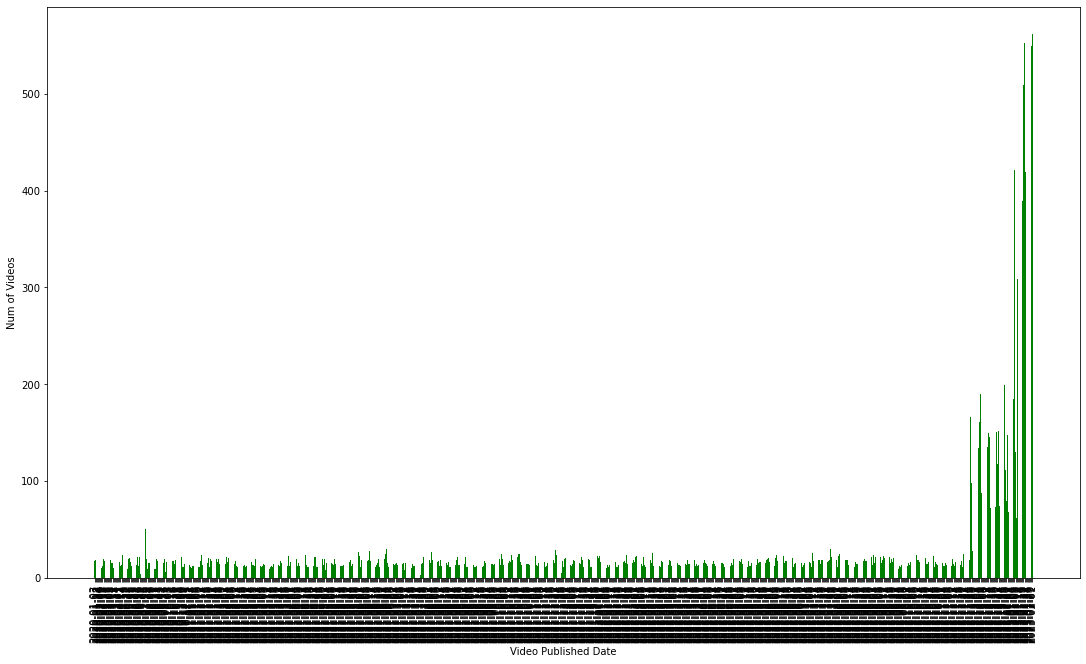

In [21]:
# Plot graph for video count per date
sorted_fetched_data_tracker = collections.OrderedDict(sorted(fetched_data_tracker.items()))

plt.bar(list(sorted_fetched_data_tracker.keys()), sorted_fetched_data_tracker.values(), 0.5, color='g')
plt.xlabel('Video Published Date')
plt.ylabel('Num of Videos')
plt.xticks(rotation='vertical')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

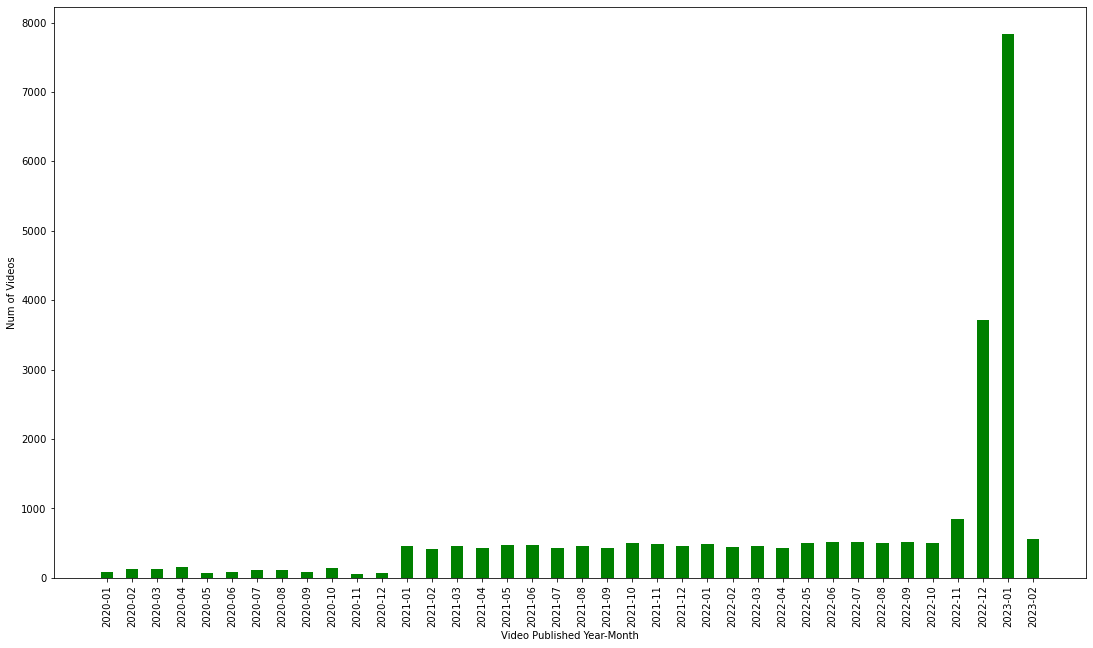

In [22]:
# Plot graph for video count per year-month
sorted_fetched_data_tracker_ym = collections.OrderedDict(sorted(fetched_data_tracker_ym.items()))

plt.bar(list(sorted_fetched_data_tracker_ym.keys()), sorted_fetched_data_tracker_ym.values(), 0.5, color='g')
plt.xlabel('Video Published Year-Month')
plt.ylabel('Num of Videos')
plt.xticks(rotation='vertical')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [23]:
# Save video data to file
# import dill

with open('Data/fitness-video-data.pkd', 'wb') as f:
    dill.dump(fitness_df, f)

In [24]:
## Load video data from file

# import dill

# with open('Data/fitness-video-data.pkd', 'rb') as f:
#     fitness_df = dill.load(f)


In [25]:
# HTML(fitness_df.to_html(escape=False, formatters=dict(thumbnail_link=path_to_image_html)))

## 2. Describe data and feature engineering

In [26]:
pip install mimesis

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mimesis import Cryptographic
from mimesis import Text
from mimesis import Datetime
from mimesis.random import Random
from mimesis import Person
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from collections import Counter
from googletrans import Translator, constants
from pprint import pprint
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/Jin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
def tags_to_words(raw_tags):
    # Function to convert a raw tags to a string of words
    # The input is a single string (a raw video tags), and
    # the output is a single string (a preprocessed video tags)

    words = raw_tags.lower().split('|')

    # In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set
    # to improve execution time this conversion should be done once
    stops = set(stopwords.words("english"))

    # Remove stop words
    meaningful_words = [w for w in words if not w in stops]

    # Join the words back into one string separated by space,
    # and return the result.
    return (",".join(meaningful_words))

def sentence_to_words(raw_sentence):
    # Function to convert a raw tags to a string of words
    # The input is a single string (a raw video tags), and
    # the output is a single string (a preprocessed video tags)

    words = raw_sentence.lower().split(' ')

    # In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set
    # to improve execution time this conversion should be done once
    stops = set(stopwords.words("english"))

    # Remove stop words
    meaningful_words = [w for w in words if not w in stops]

    # Join the words back into one string separated by space,
    # and return the result.
    return (",".join(meaningful_words))

In [31]:
# We use fitness_data moving forward for data massaging and model training
fitness_data = fitness_df

# Add new data columns
# Normalize data by number of days since video/channel published
# fitness_data['published_date_diff'] = fitness_data.apply(lambda x: abs(x['data_fetch_date'] - datetime.strptime(x['published_date'], '%Y-%m-%d').date()).days, axis=1)

# fitness_data['channel_published_date_diff'] = fitness_data.apply(lambda x: abs(x['data_fetch_date'] - datetime.strptime(x['channel_published_date'], '%Y-%m-%d').date()).days, axis=1)

# fitness_data['views_per_day'] = fitness_data.apply(lambda x: int(x['views']) / x['published_date_diff'], axis=1)

# fitness_data['likes_per_day'] = fitness_data.apply(lambda x: int(x['likes']) / x['published_date_diff'], axis=1)

# fitness_data['channel_views_per_day'] = fitness_data.apply(lambda x: int(x['channel_views']) / x['channel_published_date_diff'], axis=1)

# fitness_data['channel_subscriber_count_per_day'] = fitness_data.apply(lambda x: int(x['channel_subscriber_count']) / x['channel_published_date_diff'], axis=1)

# fitness_data['channel_video_count_per_day'] = fitness_data.apply(lambda x: int(x['channel_video_count']) / x['channel_published_date_diff'], axis=1)

In [42]:
# Add cleaned tags
fitness_data['cleaned_tags'] = fitness_data.apply(lambda x: tags_to_words(x['tags']), axis=1)
fitness_data['num_of_tags'] = fitness_data.apply(lambda x: len(x['cleaned_tags'].split(',')), axis=1)
fitness_data['cleaned_title'] = fitness_data.apply(lambda x: sentence_to_words(x['title']), axis=1)
fitness_data['cleaned_description'] = fitness_data.apply(lambda x: sentence_to_words(x['description']), axis=1)

In [33]:
# Translate title and descriptions
# en_translator = Translator()
# delimeter = ". "

# fitness_data['en_title'] = fitness_data.apply(
#     lambda x: en_translator.translate(str(x['title'])).text if en_translator.detect(str(x['title'])).lang != 'en' else str(x['title']), axis=1)

# fitness_data['en_description'] = fitness_data.apply(
#     lambda x: en_translator.translate(str(x['description'])).text if en_translator.detect(str(x['description'])).lang != 'en' else str(x['description']), axis=1)

# fitness_data['en_title_description'] = fitness_data.apply(lambda x: x['en_title'] + delimeter + x['en_description'], axis=1)

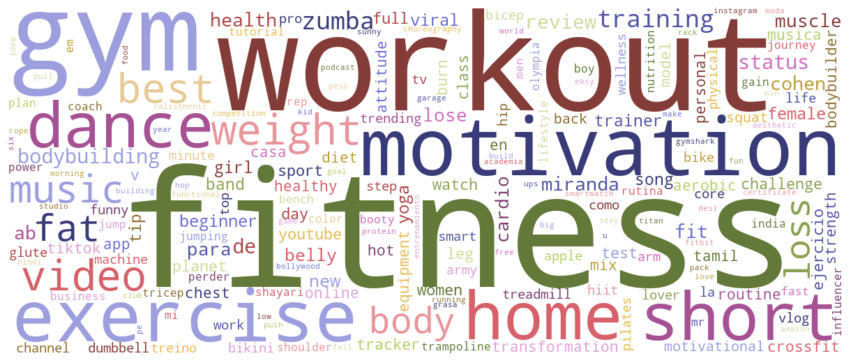

In [34]:
video_tags = list(fitness_data[fitness_data['cleaned_tags'] != '[none]']['cleaned_tags'].apply(lambda x: x.split(',')))
video_tags = [x.lower() for y in video_tags for x in y]

wd = WordCloud(width=1200, height=500,
               collocations=False, background_color="white",
               colormap="tab20b").generate(" ".join(video_tags))
plt.figure(figsize=(15, 10))
plt.imshow(wd, interpolation='bilinear')
_ = plt.axis("off")

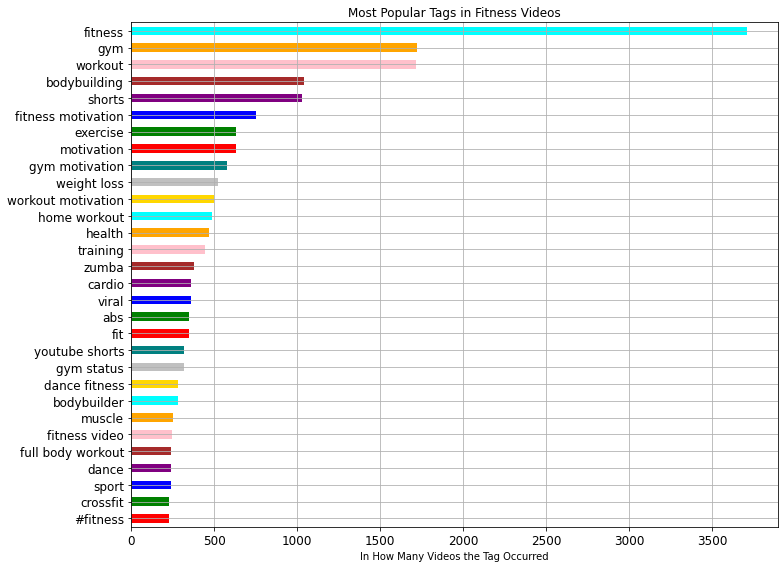

In [35]:
tagcountslice = pd.Series(video_tags).value_counts()[:30].sort_values()
tagcountslice.plot(kind='barh', title='Most Popular Tags in Fitness Videos',
                   grid=True, fontsize=12, figsize=(11,8),
                   color=['red','green','blue','purple','brown','pink','orange','cyan','gold','silver','teal'])
plt.xlabel('In How Many Videos the Tag Occurred')

plt.tight_layout()
plt.show()

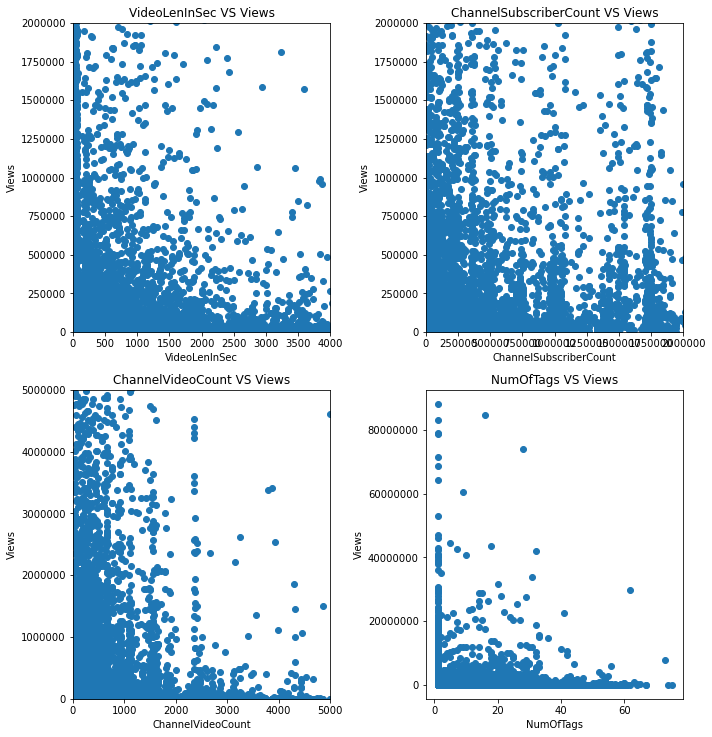

In [36]:
plt.figure(figsize=(10,15))

plt.subplot(3,2,1)
plt.scatter(fitness_data.video_len_in_sec, fitness_data.views.astype(str).astype(int))
plt.xlabel('VideoLenInSec')
plt.ylabel('Views')
plt.title('VideoLenInSec VS Views')
plt.ticklabel_format(style='plain')
plt.xlim([0, 4000])
plt.ylim([0, 2000000])

plt.subplot(3,2,2)
plt.scatter(fitness_data.channel_subscriber_count.astype(str).astype(int), fitness_data.views.astype(str).astype(int))
plt.xlabel('ChannelSubscriberCount')
plt.ylabel('Views')
plt.title('ChannelSubscriberCount VS Views')
plt.ticklabel_format(style='plain')
plt.xlim([0, 2000000])
plt.ylim([0, 2000000])

plt.subplot(3,2,3)
plt.scatter(fitness_data.channel_video_count.astype(str).astype(int), fitness_data.views.astype(str).astype(int))
plt.xlabel('ChannelVideoCount')
plt.ylabel('Views')
plt.title('ChannelVideoCount VS Views')
plt.ticklabel_format(style='plain')
plt.xlim([0, 5000])
plt.ylim([0, 5000000])

plt.subplot(3,2,4)
plt.scatter(fitness_data.num_of_tags, fitness_data.views.astype(str).astype(int))
plt.xlabel('NumOfTags')
plt.ylabel('Views')
plt.title('NumOfTags VS Views')
plt.ticklabel_format(style='plain')

plt.tight_layout()
plt.show()

In [45]:
# Training data split
views = fitness_data['views']

X = fitness_data
y = views

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Convert raw data to pandas dataframe
class ToDataFrame(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):        
        return pd.DataFrame(X)


# Change 2d array to 1d array
class FlattenArray(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):      
        return X.ravel()

In [66]:
### Description ####
cv_description = CountVectorizer(
    max_features=300,
    max_df=0.8
)

# Bag of words model
target_column = ['cleaned_description']

bag_of_words_model_description = Pipeline([
    ('to_data_frame', ToDataFrame()),
    ('features', ColumnTransformer([('rev', 'passthrough', target_column)], remainder='drop')),
    ('flat', FlattenArray()),
    ('count_vectorizer', cv_description),
    ('ridgeCV', RidgeCV(alphas=(0.1, 1.0, 10.0))),
])

bag_of_words_model_description.fit(X_train, y_train)

bag_of_words_model_description.predict(X_test)

r2_score_on_test_description = bag_of_words_model_description.score(X_test, y_test)
print("R2 score: ", r2_score_on_test_description)

print(cv_description.get_feature_names_out())

R2 score:  0.0063310064440481595
['10' '107' '15' '1976' '20' '2021' '2022' '2023' '24' '30' 'ab' 'abs'
 'act' 'aerobic' 'al' 'allowance' 'also' 'amazing' 'amazon' 'amzn' 'app'
 'apple' 'arm' 'army' 'attitude' 'back' 'band' 'be' 'beginner' 'beginners'
 'belly' 'best' 'biceps' 'bit' 'body' 'bodybuilder' 'bodybuilding' 'build'
 'burn' 'buy' 'canal' 'cardio' 'challenge' 'channel' 'check' 'chest'
 'choreography' 'class' 'classes' 'click' 'club' 'coach' 'coaching' 'code'
 'cohen' 'com' 'comment' 'complete' 'con' 'content' 'copyright' 'core'
 'credit' 'criticism' 'crossfit' 'da' 'daily' 'dance' 'day' 'days' 'de'
 'deine' 'del' 'desi' 'di' 'die' 'diet' 'disclaimer' 'download' 'du'
 'easy' 'el' 'en' 'enjoy' 'equipment' 'es' 'esta' 'este' 'every'
 'everyone' 'exercise' 'exercises' 'facebook' 'fair' 'fat' 'female' 'find'
 'first' 'fit' 'fitness' 'fitnessclub777' 'fitnessmotivation' 'follow'
 'forget' 'free' 'friends' 'full' 'fun' 'für' 'get' 'getting' 'girl'
 'give' 'go' 'goal' 'goals' 'going' '

In [67]:
### Title ####
cv_title = CountVectorizer(
    max_features=300,
    max_df=0.8
)

# Bag of words model
target_column = ['cleaned_title']

bag_of_words_model_title = Pipeline([
    ('to_data_frame', ToDataFrame()),
    ('features', ColumnTransformer([('rev', 'passthrough', target_column)], remainder='drop')),
    ('flat', FlattenArray()),
    ('count_vectorizer', cv_title),
    ('ridgeCV', RidgeCV(alphas=(0.1, 1.0, 10.0))),
])

bag_of_words_model_title.fit(X_train, y_train)

bag_of_words_model_title.predict(X_test)

r2_score_on_test_title = bag_of_words_model_title.score(X_test, y_test)
print("R2 score: ", r2_score_on_test_title)

print(cv_title.get_feature_names_out())

R2 score:  0.02479433480901394
['10' '12' '15' '20' '2020' '2021' '2022' '2023' '30' '39' 'ab' 'abs'
 'academia' 'aerobic' 'aesthetic' 'amp' 'app' 'arms' 'army' 'athlete'
 'attitude' 'back' 'backworkout' 'balance' 'band' 'bar' 'beautiful'
 'beginner' 'beginners' 'belly' 'bench' 'best' 'better' 'bicep' 'biceps'
 'big' 'bike' 'bikini' 'body' 'bodybuilder' 'bodybuilding' 'bollywood'
 'booty' 'boxing' 'boy' 'build' 'burn' 'calisthenics' 'cardio' 'casa'
 'cbum' 'center' 'challenge' 'chest' 'choreography' 'class' 'club' 'coach'
 'cohen' 'com' 'con' 'core' 'crossfit' 'daily' 'dance' 'day' 'days' 'de'
 'deadlift' 'del' 'desi' 'diet' 'don' 'dumbbell' 'easy' 'ejercicio' 'el'
 'en' 'end' 'equipegym' 'equipment' 'exercise' 'exercises' 'explore'
 'fast' 'fat' 'fatloss' 'female' 'filton' 'first' 'fit' 'fitnessjourney'
 'fitnesslifestyle' 'fitnessmodel' 'fitnessmotivation' 'flexibility'
 'follow' 'food' 'foryou' 'ft' 'full' 'fun' 'funny' 'fyp' 'für' 'get'
 'gimnasio' 'girl' 'girls' 'give' 'glutes' 'g

In [68]:
### Tags ####
cv_tags = CountVectorizer(
    max_features=300,
    max_df=0.8
)

# Bag of words model
target_column = ['cleaned_tags']

bag_of_words_model_tags = Pipeline([
    ('to_data_frame', ToDataFrame()),
    ('features', ColumnTransformer([('rev', 'passthrough', target_column)], remainder='drop')),
    ('flat', FlattenArray()),
    ('count_vectorizer', cv_tags),
    ('ridgeCV', RidgeCV(alphas=(0.1, 1.0, 10.0))),
])

bag_of_words_model_tags.fit(X_train, y_train)

bag_of_words_model_tags.predict(X_test)

# r2_score_on_test_tags = bag_of_words_model_tags.score(X_test, y_test)
# print("R2 score: ", r2_score_on_test_tags)

# print(cv_tags.get_feature_names_out())bag_of_words_model_tags.predict(X_test)

array([ 483045.15333185,  342175.84999209,  406177.99574285, ...,
         70882.14426738,  357280.29593966, -192828.95931139])

In [69]:
y_test

2350      442530
23251      32499
11000     122132
13627         23
21896        695
          ...   
2026       18677
18673       5274
10941     599447
14088    4559178
3193        1791
Name: views, Length: 4916, dtype: object